# Introduction to using the GRAL dispersion model (Graz Lagrangian Model)

## Installing GRAL
* Create a new directory GRAL and change to this directory
* Go to https://lampx.tugraz.at/~gral/ and download the latest GRAL code
* Get the latest documentation from https://lampx.tugraz.at/~gral/index.php/files/viewcategory/3-documentation-and-user-guides
* The GRAL manual describes the functionality of the GUI, the GRAL documentation contains a detailed description of the GRAL model physics, methods and test cases

## Setting up your first GRAL simulation
For detailed instructions see the GRAL manual
* Unpack the downloaded code and double click the GUI executable, e.g. GUI_GRAL_Jan18.exe

<img src="./gral_gui.png" width="500">

* Click on the open folder symbol in the top left corner and create a new folder, e.g. "MEMO2-TR20180210" for the first tracer release experiment on Sat 10 Feb 2018 during the MEMO2 training school, and select "new project"
* Click on the "Gral settings" tab and choose the following settings:

<img src="./gral_settings.png" width="600">

* Now define a domain in the "DOMAIN" tab. The easiest is to display a suitable domain in Google Earth, mark two reference points (e.g. the release point and a second point at 100-200 m distance downstream), and save the picture. You can then import the figure in GRAL and georeference the domain by entering the coordinates of the two reference points marked in the figure by clicking on the "++" symbol.

<img src="./gral_domain.png" width="600">

* Google Earth e.g. tells us for example, that the release point has coordinates 52°43'37.26"N, 4°41'28.46"E and that the second reference point has coordinates 52°43'39.61"N, 4°41'48.29"E. We can enter this in GRAL as fractional coordinates:

In [4]:
print("x1 =",4+41/60+28.46/3600)
print("y1 =",52+43/60.+37.26/3600.)
print("x2 =",4+41/60+48.29/3600)
print("y2 =",52+43/60.+39.61/3600.)

x1 = 4.691238888888889
y1 = 52.72701666666667
x2 = 4.696747222222222
y2 = 52.727669444444444


* For geo-referencing you can either define the start and end points of a line, the length of the line, and the lat/lon coordinates of a single point, or you can provide the coordinates of two selected points in the domain as described above.
* Aftger geo-referencing the figure, you can now define a  source (or multiple sources) by clicking on "Define source groups". For the tracer release experiment, we add a single source called "Tracer release"

<img src="./source_groups.png" width="400">

* Then go back to "Open/Create map", click on "point source", and specify the source e.g. as shown in the lefthand figure below. In this case we defined a source with a constant emission of 0.72 kg/h. Since we do not account for deposition in our simulation, the name of the tracer (NOx) has no importance. If you have released several tracers from the same location, you can define their releases here as well and choose different names, e.g. NH3.

<table><tr><td><img src="./gral_source.png" width="200"></td>
<td><img src="./domain_menu_symbols.png" width="160"></td></tr></table>

* Now define the simulation domain by clicking on the symbol "Define GRAL domain" in the upper left corner of the symbols section (see righthand figure above).
* In the "SOURCES" tab of the GUI, select the point source, shift it to the "used source groups list".
* Finally, go to the "COMPUTATION" tab, click on "Control files" and "Emission files" and leave the GUI.

## Running the simulation
In your project folder, you will now find the subdirectories *Computation, Settings, Emissions, Maps, Metfiles*. The computation folder contains the files *point.dat, in.dat, emissions001.dat, GRAL.geb, in.dat.sav and Max_Proc.txt*, each describing specific inputs for the simulation.

In the *in.dat* file, change the meteorology flag to "3" if you would like to directly use SONIC data, set compression to "not compressed", and on the third line select "0" for a transient simulation (multiple single cases). Make sure that in your *Computation* folder you have a properly formatted *sonic.dat* file.

In [2]:
import sys
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Randulph Morales has prepared a small collection of routines to read in (non-compressed) output from a GRAL simulation and to display the concentration field. In order to import these routines, copy the folder memo2GRAL to a proper location, at its path to your python search path using sys.path.append, and import the routines *extract* and *visualize*.

In [3]:
sys.path.append("/users/brd/Documents/Python Scripts/gral-demo-notebook")
from memo2GRAL import extract
from memo2GRAL import visualize

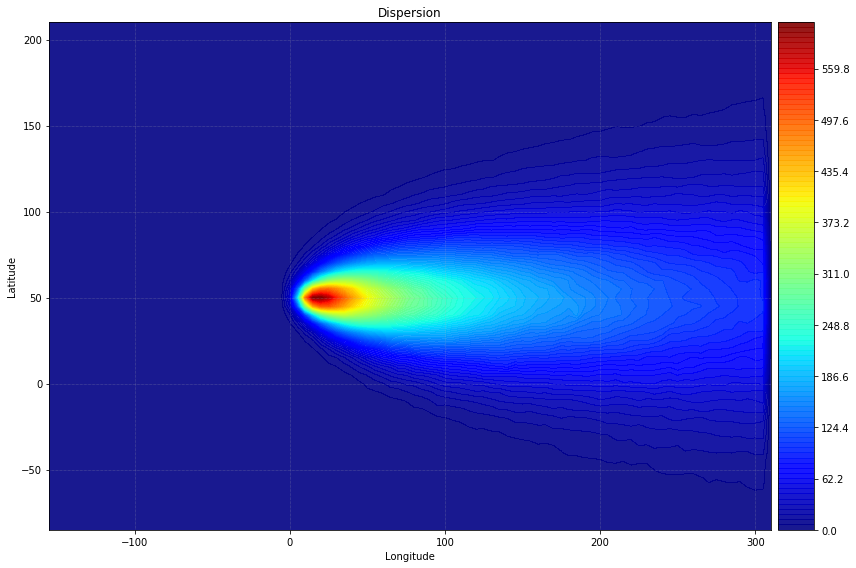

In [6]:
path = "/users/brd/Documents/Modellierung/GrammGral/MEMO2/MEMO2-demo/Computation/"
# read the domain settings from the file GRAL.geb
dom = extract.conc_domain(path)
# read the concentrations distribution for e.g. time step 4, level 2
layer = "00002-201"
conc = extract.conc_field(path,layer)
visualize.vis_field(dom,conc)